In [15]:
import numpy as np
from k_means import KMeansPlusPlus
from scipy.stats import multivariate_normal
from IPython.display import clear_output

class GMM:
    def __init__(self, k):
        self.k = k
        self.means = []
        self.covariances = []
        self.pis = []
        self.gammas = []

    def fit(self, data, initialize = True):
        """
        :params data: np.array of shape (..., dim)
                                  where dim is number of dimensions of point
        """
        if initialize: 
            self._initialize_params(data)
            return
        old_log = self.log_likelihood(data)
        losses = []
        i = 0
        while True:
            self._E_step(data)
            self._M_step(data)
            i+=1
            new_log = self.log_likelihood(data)
            losses.append(new_log)
            clear_output(wait = True)
            print (f"{i}-th iteration")
            plt.plot(range(i), losses)
            plt.show()
            if ((new_log - old_log) > 0.01 or i < 2) and i<400:
                old_log = new_log
            else:
                break

    def _initialize_params(self, data):
        km = KMeansPlusPlus(self.k)
        km.fit(data)
        self.dim = data.shape[-1]
        _, self.means = km.predict(data)
        self.means = np.unique(self.means, axis = 0)
        self.pis = np.random.uniform(0,1,(self.k,))
        self.pis = self.pis/np.sum(self.pis)
        self.covariances = np.array([np.eye(self.dim)] * self.k)*1000000000
        self.gammas = np.zeros((data.shape[0], self.k))

    def _E_step(self,data):
        for k in range(self.k):
            a = multivariate_normal(self.means[k], self.covariances[k])
            self.gammas[:,k] = (self.pis[k] * a.pdf(data))
        self.gammas = self.gammas/np.sum(self.gammas, axis = 1)[None].T

    def _M_step(self,data):
        for k in range(self.k):
            self.means[k] = np.dot(self.gammas[:,k].T, data)/np.sum(self.gammas[:,k])
            self.covariances[k] = np.zeros((self.dim, self.dim))
            for i in range(data.shape[0]):
                self.covariances[k] += self.gammas[i][k] * np.dot((data[i]-self.means[k])[None].T, (data[i]-self.means[k][None]))
            self.covariances[k] /= np.sum(self.gammas[:,k])
            self.pis[k] = np.sum(self.gammas[:,k]) / data.shape[0]

    def predict(self, data):
        new_gammas = np.zeros((data.shape[0], self.k))
        for k in range(self.k):
            a = multivariate_normal(self.means[k], self.covariances[k])
            new_gammas[:,k] = self.pis[k] * a.pdf(data)
        new_gammas = new_gammas/np.sum(new_gammas, axis = 1)[None].T
        classes = np.argmax(new_gammas, axis = 1)
        return classes

    def get_means(self):
        return self.means.copy()

    def get_covariances(self):
        return self.covariances.copy()

    def get_pis(self):
        return self.pis.copy()
    
    def log_likelihood(self, data):
        return np.sum(np.log(np.sum(self.gammas * self.pis, axis = 1)))
                

0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


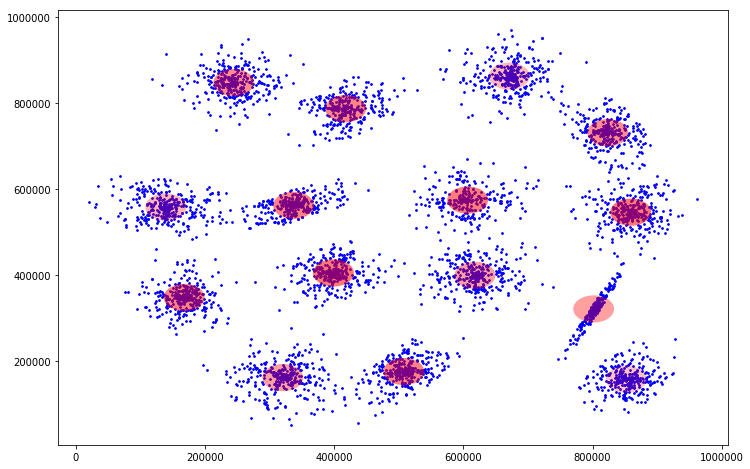

In [12]:
#!/usr/bin/env python3
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
#from gmm import GMM
import winsound
from time import sleep

def get_ellipse_from_covariance(matrix, std_multiplier=2):
    values, vectors = np.linalg.eig(matrix)
    maxI = np.argmax(values)
    large, small = values[maxI], values[1 - maxI]
    return (std_multiplier * np.sqrt(large),
            std_multiplier * np.sqrt(small),
            np.rad2deg(np.arccos(vectors[0, 0])))



df = pd.read_csv('sparse_clusters.csv')
data = np.array(df[['X', 'Y']])
gmm = GMM(15)
gmm.fit(data)
for i in range(2):
    plt.figure(figsize = (12,8))
    mean = gmm.get_means()
    sigma = gmm.get_covariances()
    pi = gmm.get_pis()
    #print (mean, sigma, pi)
    # Plot ellipses for each of covariance matrices.
    clear_output(wait = True)
    print (i)
    plt.clf()
    plt.scatter(data[:, 0], data[:, 1], s=3, color='blue')
    for k in range(len(sigma)):
        #print (sigma[k])
        h, w, angle = get_ellipse_from_covariance(sigma[k])
        e = patches.Ellipse(mean[k], w, h, angle=angle)
        e.set_alpha(np.power(pi[k], .3))
        e.set_facecolor('red')
        plt.axes().add_artist(e)
    #plt.savefig('edgar_gmm_sparse.jpg')
    plt.show()
    break
    if i == 0:
        
        sleep(5)
        gmm.fit(data, False)
    
#winsound.Beep(2500, 200)



In [5]:
f"{1}th iteration"

'1th iteration'

In [35]:
mean

array([[153643.22520124, 453235.47595207],
       [171040.13036721, 826461.85087368],
       [243287.93059481, 844726.90081326],
       [242433.20117655, 851262.7006524 ],
       [293023.36150364, 830774.01854913],
       [321626.43467398, 161009.95090265],
       [368582.02717808, 481407.41746182],
       [418111.33690001, 787388.6137822 ],
       [507366.15516439, 175243.84870053],
       [612971.29431092, 481307.42445035],
       [671530.2039657 , 863320.16641526],
       [802377.61020496, 319905.43744844],
       [823415.92849208, 731555.35964372],
       [852669.67855954, 157390.10067319],
       [858879.33372128, 546806.19300806]])

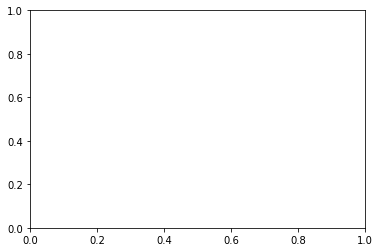

In [62]:
for k in range(len(sigma)):
    #print (sigma[k])
    h, w, angle = get_ellipse_from_covariance(sigma[k])
    e = patches.Ellipse(mean[k], w, h, angle=angle)
    e.set_alpha(np.power(pi[k], .3))
    e.set_facecolor('red')
    plt.clf()
    plt.axes().add_artist(e)
plt.savefig('edgar_gmm_sparse.jpg')
plt.show()

In [61]:
print(e)

Ellipse(xy=(858879.3337212838, 546806.1930080567), width=60111.304843531085, height=66785.42551698087, angle=171.31673475819846)


17-th iteration


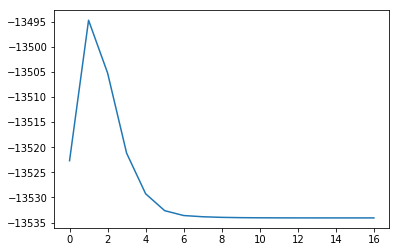

KeyboardInterrupt: 

In [16]:

gmm.fit(data, False)
plt.figure(figsize = (12,8))
mean = gmm.get_means()
sigma = gmm.get_covariances()
pi = gmm.get_pis()
#print (mean, sigma, pi)
# Plot ellipses for each of covariance matrices.
clear_output(wait = True)
print (i)
plt.clf()
plt.scatter(data[:, 0], data[:, 1], s=3, color='blue')
for k in range(len(sigma)):
    #print (sigma[k])
    h, w, angle = get_ellipse_from_covariance(sigma[k])
    e = patches.Ellipse(mean[k], w, h, angle=angle)
    e.set_alpha(np.power(pi[k], .3))
    e.set_facecolor('red')
    plt.axes().add_artist(e)
#plt.savefig('edgar_gmm_sparse.jpg')
plt.show()